# 5.1 MNIST

In [2]:
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from tqdm.auto import tqdm

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [3]:
# Training data
train = datasets.MNIST("", train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))

# Testing data
test = datasets.MNIST("", train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

train_loader = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
test_loader = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)


In [ ]:
def viz_img(mat):
    if mat.shape.__len__() == 3:
        mat = mat.squeeze(0)
        
    plt.imshow(mat.numpy())

def viz_pred(logits):
    plt.bar(np.arange(0, 10), logits.squeeze(0).detach().numpy())
    plt.xticks(np.arange(0, 10))

    plt.show()
    

(1,)

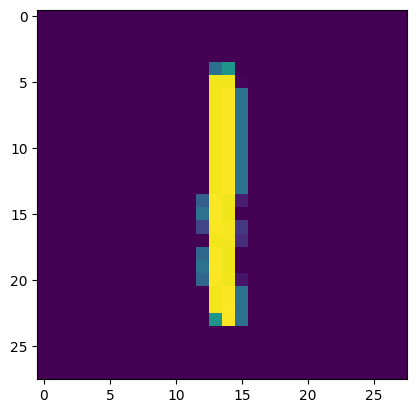

In [ ]:
# See the image and the label
viz_img(train[102][0])

train[102][1], 

In [ ]:
class NonLinCLf(torch.nn.Module):
    
    def __init__(self):
        super().__init__()
        self.l1 = torch.nn.Linear(784, 100)
        self.l2 = torch.nn.Linear(100, 10)

    def forward(self, x):
        x = self.l1(x)
        # act
        x = torch.relu(x)
        x = self.l2(x)
        return torch.softmax(x, dim=1)
    
model = NonLinCLf()


In [63]:
lfn = torch.nn.CrossEntropyLoss()
opt = torch.optim.SGD(model.parameters(), lr=0.01)
epochs = 20
for epoch in range(epochs):
    print(epoch)
    for batch in train_loader:
        
        # reset gradients
        opt.zero_grad()

        inputs, target = batch
        preds = model(inputs.reshape(-1, 784))

        loss = lfn(preds, target)

        loss.backward()

        opt.step()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


torch.Size([1, 28, 28]) 0


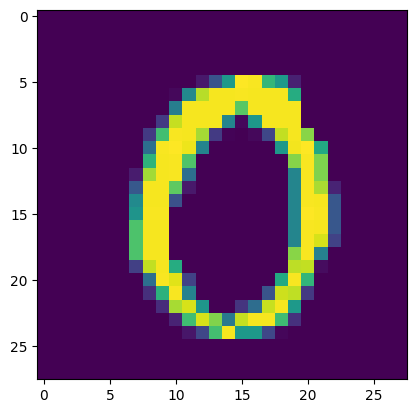

In [71]:
i = 13
print(test[i][0].shape, test[i][1])
viz_img(test[i][0])

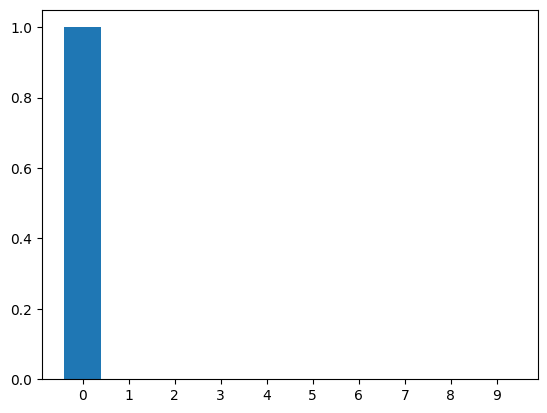

In [72]:
pred = model(test[i][0].reshape(-1, 28*28))
viz_pred(pred)